<a href="https://colab.research.google.com/github/nlakshmanan/Flight-Prices-Prediction/blob/master/Flight_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing data
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python


In [151]:
import pandas as pd
trainingFile = r"/content/drive/My Drive/Fall_2018/flightDataset/_training_data.csv"
testingFile = r"/content/drive/My Drive/Fall_2018/flightDataset/test_data_12_10.csv"
df_train = pd.read_csv(trainingFile)
#check the decoration
df_train.columns
df_train.head

<bound method NDFrame.head of       origin destination  numHrsToFly  ...            airline  FlightNo Buy/Wait
0        ORD         BWI         0.04  ...  American Airlines       985      Buy
1        ORD         BWI         0.13  ...  American Airlines      2296      Buy
2        ORD         BWI         0.16  ...  American Airlines      3522      Buy
3        ORD         BWI         0.16  ...  American Airlines      3522      Buy
4        ORD         BWI         0.18  ...    Delta Air Lines      3742     Wait
...      ...         ...          ...  ...                ...       ...      ...
67715    ORD         SFO       374.84  ...    United Airlines       493     Wait
67716    ORD         SFO       374.84  ...    Alaska Airlines       105     Wait
67717    ORD         SFO       375.44  ...    United Airlines      1883     Wait
67718    ORD         SFO       375.52  ...    United Airlines      1742     Wait
67719    ORD         SFO       376.34  ...  American Airlines      2374     Wai

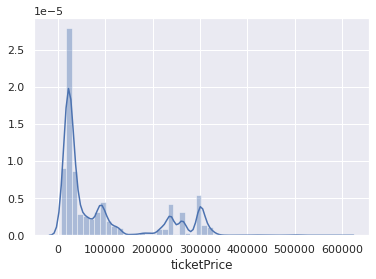

In [152]:
#Analysing ticketPrice
df_train['ticketPrice'].describe()
#histogram
import seaborn as sns
sns.distplot(df_train['ticketPrice']);

In [153]:
#Remove data with ticket price > 100000
df_train['ticketPrice'] = df_train[df_train['ticketPrice'] < 100000]['ticketPrice']
df_train.dropna()

,origin,destination,numHrsToFly,flyDurationMins,numStops,overnightFlight,DayOfWeekToBook,ticketPrice,airline,FlightNo,Buy/Wait
0,ORD,BWI,0.04,110,0,no,4,26557.0,American Airlines,985,Buy
1,ORD,BWI,0.13,115,0,no,4,26557.0,American Airlines,2296,Buy
2,ORD,BWI,0.16,558,2,no,4,25972.0,American Airlines,3522,Buy
3,ORD,BWI,0.16,474,2,no,4,25972.0,American Airlines,3522,Buy
4,ORD,BWI,0.18,236,1,no,4,27584.0,Delta Air Lines,3742,Wait
...,...,...,...,...,...,...,...,...,...,...,...
67715,ORD,SFO,374.84,293,0,no,3,18493.0,United Airlines,493,Wait
67716,ORD,SFO,374.84,480,1,no,3,16143.0,Alaska Airlines,105,Wait
67717,ORD,SFO,375.44,280,0,no,3,18348.0,United Airlines,1883,Wait
67718,ORD,SFO,375.52,293,0,no,3,18493.0,United Airlines,1742,Wait


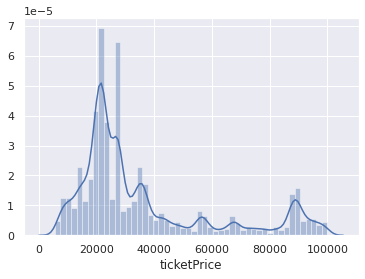

In [154]:
sns.distplot(df_train['ticketPrice']);

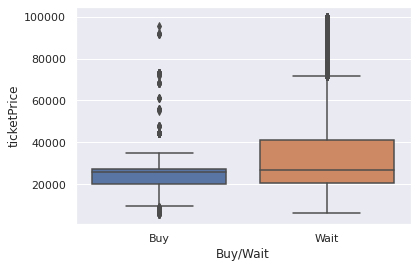

In [155]:
#Analysing class
import matplotlib.pyplot as plt
#box plot overallqual/saleprice
var = 'Buy/Wait'
data = pd.concat([df_train['ticketPrice'], df_train[var]], axis=1)
f, ax = plt.subplots()
fig = sns.boxplot(x=var, y="ticketPrice", data=data)

In [156]:
#Approach 1 - Logistic regression Binary Classification
# y - predict variable: Is this the best time to buy a flight tickect?
df_train["Buy/Wait"].value_counts()

Wait    67197
Buy       523
Name: Buy/Wait, dtype: int64

In [157]:
#Our class is imbalanced:
df_train.groupby("Buy/Wait").mean()

,numHrsToFly,flyDurationMins,numStops,DayOfWeekToBook,ticketPrice,FlightNo
Buy/Wait,,,,,,
Buy,100.767285,799.715105,1.116635,3.405354,28676.564202,2302.173996
Wait,193.513071,901.564772,1.183967,3.025596,35817.483576,2084.963213


In [0]:
#Convert Buy/Wait into numerical data
#Convert destination into numerical data Label encoding
df_train["Buy/Wait"] = df_train["Buy/Wait"].astype('category')
df_train["Buy/Wait"] = df_train["Buy/Wait"].cat.codes
df_train["destination"] = df_train["destination"].astype('category')
df_train["destination"] = df_train["destination"].cat.codes

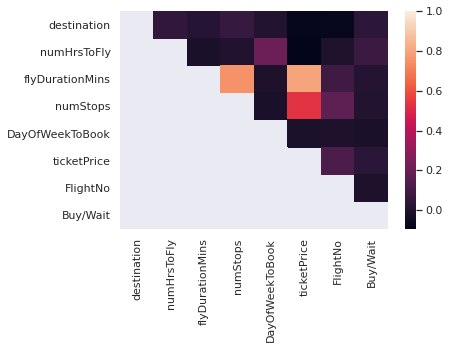

In [159]:
#correlation matrix
import numpy as np

mask = np.tril(df_train.corr())
sns.heatmap(df_train.corr(), annot=False, mask=mask)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


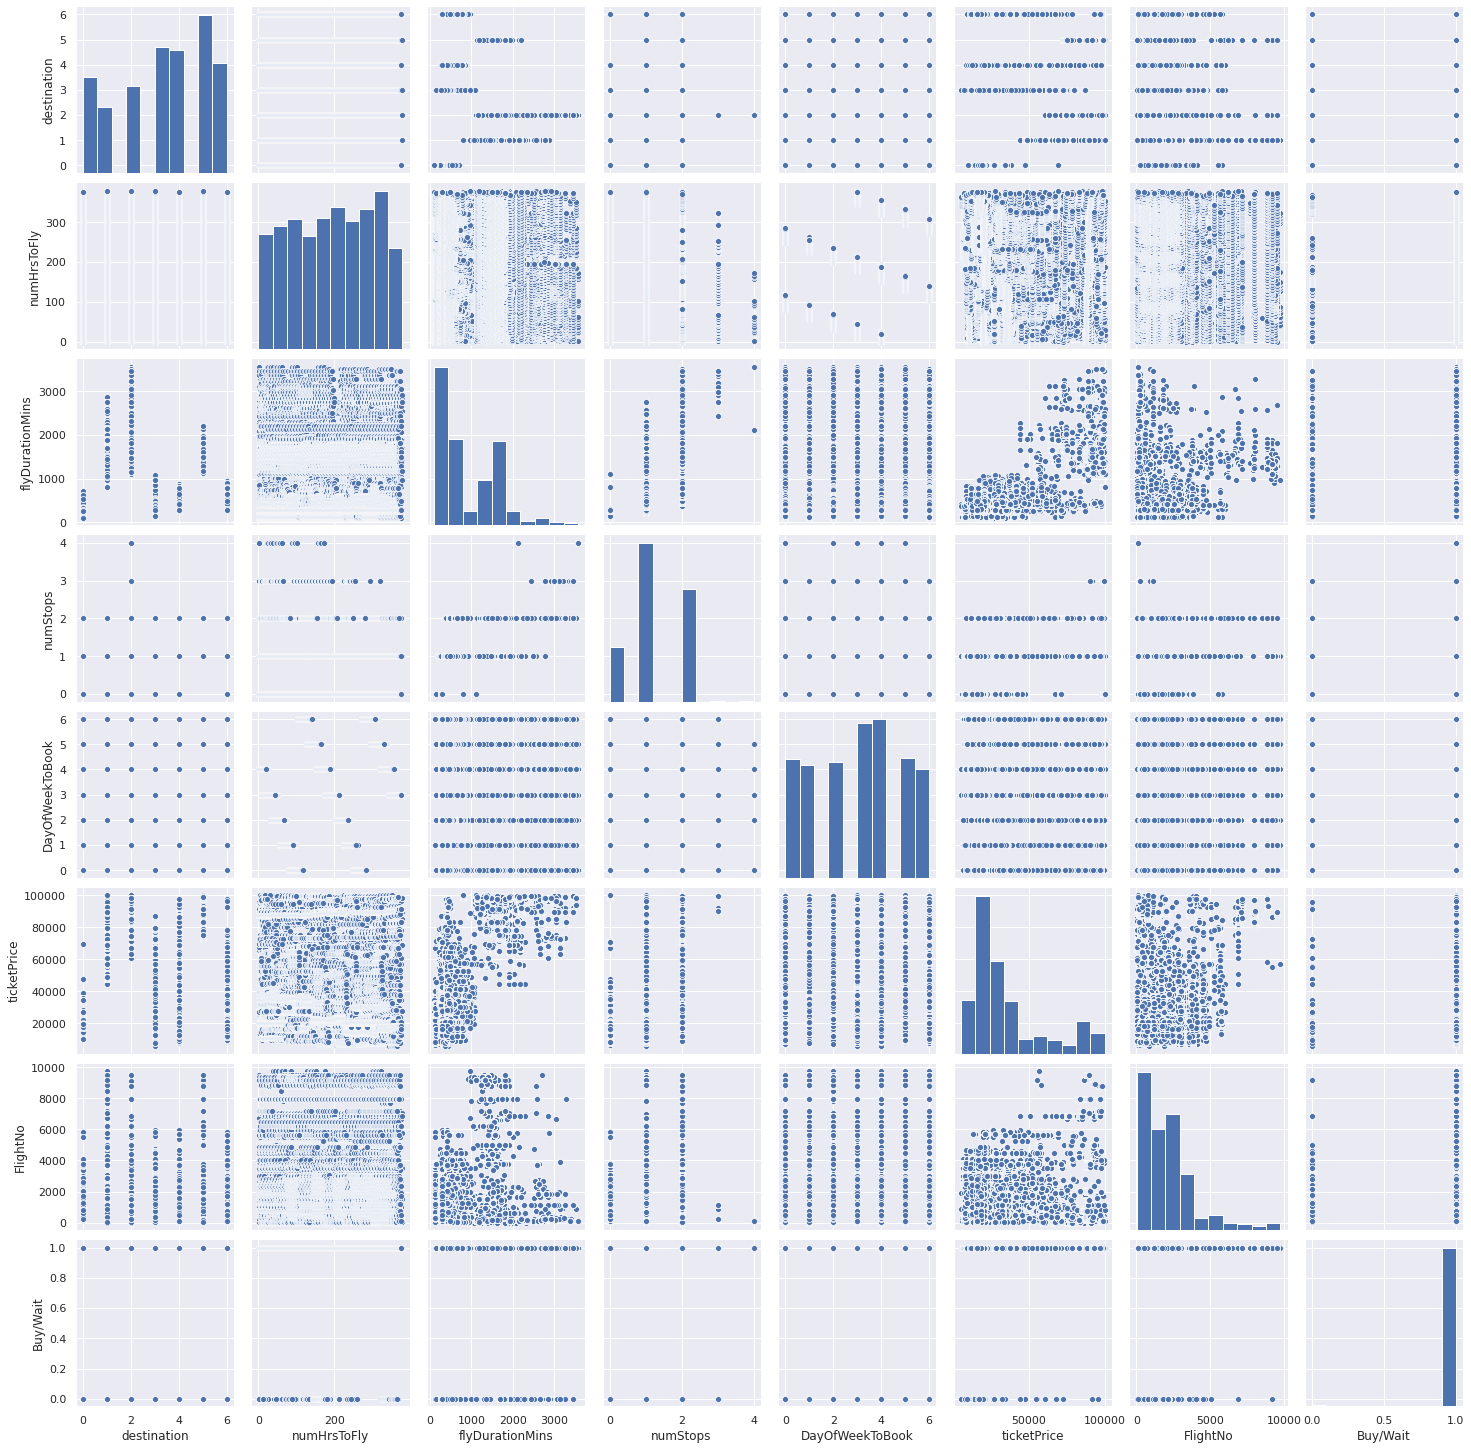

In [160]:
#scatterplot
sns.set()
sns.pairplot(df_train, size = 2.5)
plt.show();

# K-Nearest Neighbour

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

http://vision.stanford.edu/teaching/cs231n-demos/knn/

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.


KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

# Logistic Regression

# Randomn Trees

No missing data, as data set was made by web scrapping

When we see a pig, we shout “pig!” When it’s not a pig, we shout “no, not pig!” After doing this several times with the child, we show them a picture and ask “pig?” and they will correctly (most of the time) say “pig!” or “no, not pig!” depending on what the picture is. That is supervised machine learning.
